# Homework 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
# adding path of smithplot
sys.path.append(os.path.join(os.getcwd(),"smithplot"))
from smithplot import SmithAxes

fig = plt.figure()

# # Making some test data
# thetas = np.linspace(0,2*np.pi,100)
# S = 0.316*np.exp(1j*thetas)

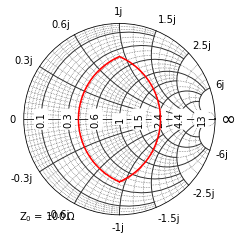

In [2]:
# Plot the Cripps contour for Z0 = R_L_opt Ω
R_L_opt = 100
Z0 = R_L_opt
ax = plt.subplot(1,1,1,projection='smith',axes_impedance=Z0)
R = 40 # Lower resistance which gives the desired attenuation, must be < Z0
X = np.sqrt(R_L_opt**2-R**2) # did some algebra to get here
ctr_left = R + 1j*np.linspace(-X,X,100) # Broadcasts to sweep
ctr_right = R_L_opt**2/ctr_left # flippy dippy
ctr = np.concatenate((ctr_left,ctr_right))

plt.plot(ctr,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
plt.show()

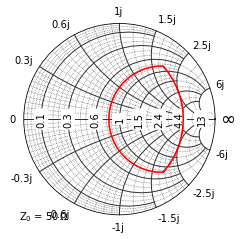

In [3]:
# Plot the Cripps contour given a resistance for Z0 = 50 Ω
ax = plt.subplot(1,1,1,projection='smith',axes_impedance=50)

plt.plot(ctr,datatype=SmithAxes.Z_PARAMETER,markersize=0.2,color='r')
plt.show()